In [1]:
import time
first = time.time()

import pandas as pd
from sklearn.model_selection import cross_val_score
from grakel.datasets import fetch_dataset
from grakel.kernels import RandomWalk

# Loads the MUTAG dataset
MUTAG = fetch_dataset("MUTAG", verbose=False)
G, y = MUTAG.data, MUTAG.target

# Uses the RandomWalk kernel to generate the kernel matrices
gk = RandomWalk()
K_train = gk.fit_transform(G)

second = time.time()
print(second-first)

12.941582202911377


In [78]:
from sklearn.svm import SVC

clf_SVM = SVC(kernel="precomputed")
df_SVC = pd.DataFrame(columns=["max","min","mean","std"])
for k in range(5,11):
    cv_scores = cross_val_score(clf_SVM,K_train,y,cv=k)
    print(f"Scores of {k}-fold validation :", cv_scores)
    max_svc = cv_scores.max()
    min_svc = cv_scores.min()
    mean_svc= cv_scores.mean()
    std_svc = cv_scores.std()
    tmp_Series = pd.DataFrame({"max":[max_svc],"min":[min_svc],"mean":[mean_svc],"std":[std_svc]},index=[k])
    df_SVC = df_SVC.append(tmp_Series)
    
df_SVC

Scores of 5-fold validation : [0.97368421 0.89473684 0.89473684 0.81081081 0.81081081]
Scores of 6-fold validation : [0.96875    0.9375     0.90322581 0.90322581 0.83870968 0.77419355]
Scores of 7-fold validation : [0.96296296 0.88888889 0.96296296 0.85185185 0.92592593 0.81481481
 0.73076923]
Scores of 8-fold validation : [1.         0.875      0.91666667 0.875      0.95652174 0.82608696
 0.86956522 0.69565217]
Scores of 9-fold validation : [0.95238095 0.9047619  0.95238095 0.9047619  0.85714286 0.9047619
 0.80952381 0.95238095 0.65      ]
Scores of 10-fold validation : [0.94736842 0.94736842 0.89473684 0.94736842 0.84210526 0.89473684
 0.89473684 0.73684211 0.88888889 0.72222222]


,max,min,mean,std
5,0.973684,0.810811,0.876956,0.061219
6,0.968750,0.774194,0.887601,0.064310
7,0.962963,0.730769,0.876882,0.078556
8,1.000000,0.695652,0.876812,0.085563
9,0.952381,0.650000,0.876455,0.091792
10,0.947368,0.722222,0.871637,0.077763


In [79]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression()
df_reg = pd.DataFrame(columns=["max","min","mean","std"])
for k in range(5,11):
    cv_scores = cross_val_score(reg,K_train,y,cv=k)
    print(f"Scores of {k}-fold validation :", cv_scores)
    max_reg = cv_scores.max()
    min_reg = cv_scores.min()
    mean_reg= cv_scores.mean()
    std_reg = cv_scores.std()
    tmp_Series = pd.DataFrame({"max":[max_reg],"min":[min_reg],"mean":[mean_reg],"std":[std_reg]},index=[k])
    df_reg = df_reg.append(tmp_Series)
    
df_reg

Scores of 5-fold validation : [0.86842105 0.89473684 0.89473684 0.81081081 0.81081081]
Scores of 6-fold validation : [0.875      0.75       0.83870968 0.83870968 0.80645161 0.77419355]
Scores of 7-fold validation : [0.77777778 0.88888889 0.85185185 0.81481481 0.81481481 0.81481481
 0.73076923]
Scores of 8-fold validation : [0.91666667 0.79166667 0.83333333 0.83333333 0.91304348 0.73913043
 0.86956522 0.69565217]
Scores of 9-fold validation : [0.9047619  0.80952381 0.9047619  0.85714286 0.80952381 0.85714286
 0.76190476 0.95238095 0.65      ]
Scores of 10-fold validation : [0.94736842 0.89473684 0.73684211 1.         0.84210526 0.89473684
 0.89473684 0.73684211 0.72222222 0.72222222]


,max,min,mean,std
5,0.894737,0.810811,0.855903,0.038051
6,0.875000,0.750000,0.813844,0.042189
7,0.888889,0.730769,0.813390,0.046721
8,0.916667,0.695652,0.824049,0.073729
9,0.952381,0.650000,0.834127,0.085213
10,1.000000,0.722222,0.839181,0.097540


In [80]:
from sklearn.ensemble import AdaBoostClassifier

adb = AdaBoostClassifier()
df_adb = pd.DataFrame(columns=["max","min","mean","std"])
for k in range(5,11):
    cv_scores = cross_val_score(adb,K_train,y,cv=k)
    print(f"Scores of {k}-fold validation :", cv_scores)
    max_adb = cv_scores.max()
    min_adb = cv_scores.min()
    mean_adb= cv_scores.mean()
    std_adb = cv_scores.std()
    tmp_Series = pd.DataFrame({"max":[max_adb],"min":[min_adb],"mean":[mean_adb],"std":[std_adb]},index=[k])
    df_adb = df_adb.append(tmp_Series)
    
df_adb

Scores of 5-fold validation : [0.97368421 0.84210526 0.89473684 0.78378378 0.81081081]
Scores of 6-fold validation : [0.96875    0.9375     0.74193548 0.87096774 0.80645161 0.77419355]
Scores of 7-fold validation : [0.96296296 0.92592593 0.88888889 0.85185185 0.88888889 0.74074074
 0.73076923]
Scores of 8-fold validation : [1.         0.91666667 0.875      0.875      0.95652174 0.82608696
 0.73913043 0.69565217]
Scores of 9-fold validation : [0.95238095 0.95238095 0.9047619  0.85714286 0.80952381 0.80952381
 0.85714286 0.85714286 0.7       ]
Scores of 10-fold validation : [0.94736842 0.94736842 0.89473684 0.89473684 0.73684211 0.89473684
 0.84210526 0.68421053 0.83333333 0.72222222]


,max,min,mean,std
5,0.973684,0.783784,0.861024,0.067341
6,0.968750,0.741935,0.849966,0.083185
7,0.962963,0.730769,0.855718,0.082357
8,1.000000,0.695652,0.860507,0.097047
9,0.952381,0.700000,0.855556,0.074248
10,0.947368,0.684211,0.839766,0.089931


In [81]:
from sklearn.ensemble import RandomForestClassifier
# Uses the SVM classifier to perform classification
rfc = RandomForestClassifier()
df_rfc = pd.DataFrame(columns=["max","min","mean","std"])
for k in range(5,11):
    cv_scores = cross_val_score(rfc,K_train,y,cv=k)
    print(f"Scores of {k}-fold validation :", cv_scores)
    max_rfc = cv_scores.max()
    min_rfc = cv_scores.min()
    mean_rfc= cv_scores.mean()
    std_rfc = cv_scores.std()
    tmp_Series = pd.DataFrame({"max":[max_rfc],"min":[min_rfc],"mean":[mean_rfc],"std":[std_rfc]},index=[k])
    df_rfc = df_rfc.append(tmp_Series)
    
df_rfc

Scores of 5-fold validation : [0.92105263 0.89473684 0.84210526 0.75675676 0.78378378]
Scores of 6-fold validation : [0.9375     0.90625    0.77419355 0.83870968 0.80645161 0.77419355]
Scores of 7-fold validation : [0.92592593 0.85185185 0.92592593 0.85185185 0.88888889 0.77777778
 0.73076923]
Scores of 8-fold validation : [0.95833333 0.91666667 0.875      0.70833333 0.91304348 0.82608696
 0.73913043 0.69565217]
Scores of 9-fold validation : [0.95238095 0.95238095 0.85714286 0.85714286 0.80952381 0.80952381
 0.85714286 0.85714286 0.65      ]
Scores of 10-fold validation : [0.94736842 0.89473684 0.84210526 0.94736842 0.68421053 0.89473684
 0.84210526 0.68421053 0.77777778 0.66666667]


,max,min,mean,std
5,0.921053,0.756757,0.839687,0.062705
6,0.937500,0.774194,0.839550,0.062825
7,0.925926,0.730769,0.850427,0.068117
8,0.958333,0.695652,0.829031,0.096189
9,0.952381,0.650000,0.844709,0.084454
10,0.947368,0.666667,0.818129,0.103310


In [83]:
from sklearn.neighbors import KNeighborsClassifier
# Uses the SVM classifier to perform classification
knn = KNeighborsClassifier(n_neighbors=5)
df_knn = pd.DataFrame(columns=["max","min","mean","std"])
for k in range(5,11):
    cv_scores = cross_val_score(knn,K_train,y,cv=k)
    print(f"Scores of {k}-fold validation :", cv_scores)
    max_knn = cv_scores.max()
    min_knn = cv_scores.min()
    mean_knn= cv_scores.mean()
    std_knn = cv_scores.std()
    tmp_Series = pd.DataFrame({"max":[max_knn],"min":[min_knn],"mean":[mean_knn],"std":[std_knn]},index=[k])
    df_knn = df_knn.append(tmp_Series)
    
df_knn

Scores of 5-fold validation : [0.94736842 0.94736842 0.86842105 0.81081081 0.78378378]
Scores of 6-fold validation : [0.9375     0.9375     0.90322581 0.83870968 0.87096774 0.77419355]
Scores of 7-fold validation : [0.92592593 0.92592593 1.         0.81481481 0.88888889 0.77777778
 0.73076923]
Scores of 8-fold validation : [0.95833333 0.91666667 0.95833333 0.875      0.91304348 0.82608696
 0.7826087  0.69565217]
Scores of 9-fold validation : [0.95238095 0.95238095 0.9047619  1.         0.80952381 0.80952381
 0.85714286 0.9047619  0.65      ]
Scores of 10-fold validation : [0.94736842 0.94736842 0.89473684 1.         0.89473684 0.84210526
 0.84210526 0.84210526 0.77777778 0.66666667]


,max,min,mean,std
5,0.947368,0.783784,0.871550,0.067674
6,0.937500,0.774194,0.877016,0.057850
7,1.000000,0.730769,0.866300,0.088117
8,0.958333,0.695652,0.865716,0.086224
9,1.000000,0.650000,0.871164,0.099308
10,1.000000,0.666667,0.865497,0.090596


Minimum error:- 0.05263157894736842 at K = 4


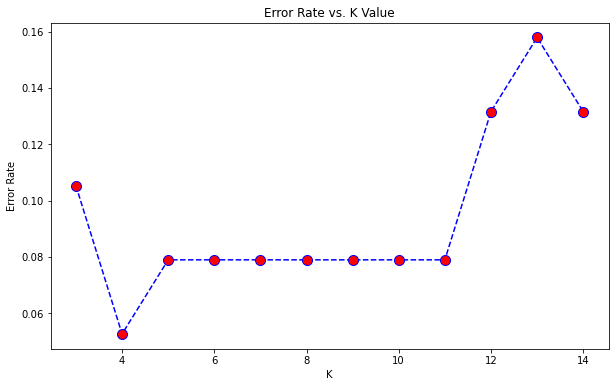

In [54]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
X_train, X_test, y_train, y_test = train_test_split( G, y, test_size=0.2, random_state=42)
# Uses the RandomWalk kernel to generate the kernel matrices
gk = RandomWalk()
K_train_ = gk.fit_transform(X_train)
K_test_ = gk.transform(X_test)

# Uses the SVM classifier to perform classification
error_rate = []
for i in range(3,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(K_train_,y_train)
    pred_i = knn.predict(K_test_)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(3,15),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",(error_rate.index(min(error_rate))+3))

In [100]:
df = pd.concat([df_SVC,df_reg,df_adb,df_knn,df_rfc],keys=["SVM","LogReg","ADB","KNN","RFC"])

df

max       min      mean       std
SVM    5   0.973684  0.810811  0.876956  0.061219
       6   0.968750  0.774194  0.887601  0.064310
       7   0.962963  0.730769  0.876882  0.078556
       8   1.000000  0.695652  0.876812  0.085563
       9   0.952381  0.650000  0.876455  0.091792
       10  0.947368  0.722222  0.871637  0.077763
LogReg 5   0.894737  0.810811  0.855903  0.038051
       6   0.875000  0.750000  0.813844  0.042189
       7   0.888889  0.730769  0.813390  0.046721
       8   0.916667  0.695652  0.824049  0.073729
       9   0.952381  0.650000  0.834127  0.085213
       10  1.000000  0.722222  0.839181  0.097540
ADB    5   0.973684  0.783784  0.861024  0.067341
       6   0.968750  0.741935  0.849966  0.083185
       7   0.962963  0.730769  0.855718  0.082357
       8   1.000000  0.695652  0.860507  0.097047
       9   0.952381  0.700000  0.855556  0.074248
       10  0.947368  0.684211  0.839766  0.089931
KNN    5   0.947368  0.783784  0.871550  0.067674
       6   0.937500  0.774194  0.877016  0.057850
       7   1.000000  0.730769  0.866300  0.088117
       8   0.958333  0.695652  0.865716  0.086224
       9   1.000000  0.650000  0.871164  0.099308
       10  1.000000  0.666667  0.865497  0.090596
RFC    5   0.921053  0.756757  0.839687  0.062705
       6   0.937500  0.774194  0.839550  0.062825
       7   0.925926  0.730769  0.850427  0.068117
       8   0.958333  0.695652  0.829031  0.096189
       9   0.952381  0.650000  0.844709  0.084454
       10  0.947368  0.666667  0.818129  0.103310

In [101]:
df.describe()

,max,min,mean,std
count,30.000000,30.000000,30.000000,30.000000
mean,0.954124,0.721819,0.853605,0.076804
std,0.033267,0.047921,0.020827,0.017152
min,0.875000,0.650000,0.813390,0.038051
25%,0.939967,0.695652,0.839584,0.065068
50%,0.952381,0.726496,0.855811,0.080456
75%,0.972451,0.755068,0.871454,0.089478
max,1.000000,0.810811,0.887601,0.103310


In [103]:
df_Compare = pd.concat([df_SVC,df_knn],keys=["SVM","KNN"],axis=1)
df_Compare

SVM                                     KNN                      \
         max       min      mean       std       max       min      mean   
5   0.973684  0.810811  0.876956  0.061219  0.947368  0.783784  0.871550   
6   0.968750  0.774194  0.887601  0.064310  0.937500  0.774194  0.877016   
7   0.962963  0.730769  0.876882  0.078556  1.000000  0.730769  0.866300   
8   1.000000  0.695652  0.876812  0.085563  0.958333  0.695652  0.865716   
9   0.952381  0.650000  0.876455  0.091792  1.000000  0.650000  0.871164   
10  0.947368  0.722222  0.871637  0.077763  1.000000  0.666667  0.865497   

              
         std  
5   0.067674  
6   0.057850  
7   0.088117  
8   0.086224  
9   0.099308  
10  0.090596